# Visualisation tools to map crop and environmental variables regionally

In [422]:
#Import required packages
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import dateutil
import pylab as py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile
import pandas as pd
import geopandas as gp
import georaster
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Extend Python window to work better
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [452]:
#Creating datasets for each map:
data = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data.csv')
data2 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data2.csv')
data3 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data3.csv')
data4 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data4.csv')
data5 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data5.csv')
data6 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data6.csv')
data7 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data7.csv')
data8 = pd.read_csv(r'C:\Users\jjojeda\Dropbox\Victor\data8.csv')

# Creating arrays of variables will be used for each map:
lat = data['lat'].values
lon = data['lon'].values
lat2 = data2['lat'].values
lon2 = data2['lon'].values
lat3 = data3['lat'].values
lon3 = data3['lon'].values
lat4 = data4['lat'].values
lon4 = data4['lon'].values
lat5 = data5['lat'].values
lon5 = data5['lon'].values
lat6 = data6['lat'].values
lon6 = data6['lon'].values
lat7 = data7['lat'].values
lon7 = data7['lon'].values
lat8 = data8['lat'].values
lon8 = data8['lon'].values
heat = data['heat_Jday'].values
heat2 = data2['heat_Jday'].values
heat3 = data3['heat_Jday'].values
frost = data['frost_Jday'].values
frost4 = data4['frost_Jday'].values
frost5 = data5['frost_Jday'].values
frost6 = data6['frost_Jday'].values
frost7 = data7['frost_Jday'].values
dist_inland = data['dist_inland'].values
dist_inland8 = data8['dist_inland'].values
window = data['window'].values
altitude = data['alt'].values
ID = data['ID'].values
ID2 = data2['ID'].values
ID3 = data3['ID'].values
ID4 = data4['ID'].values
ID5 = data5['ID'].values
ID6 = data6['ID'].values
ID7 = data7['ID'].values
ID8 = data8['ID'].values

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


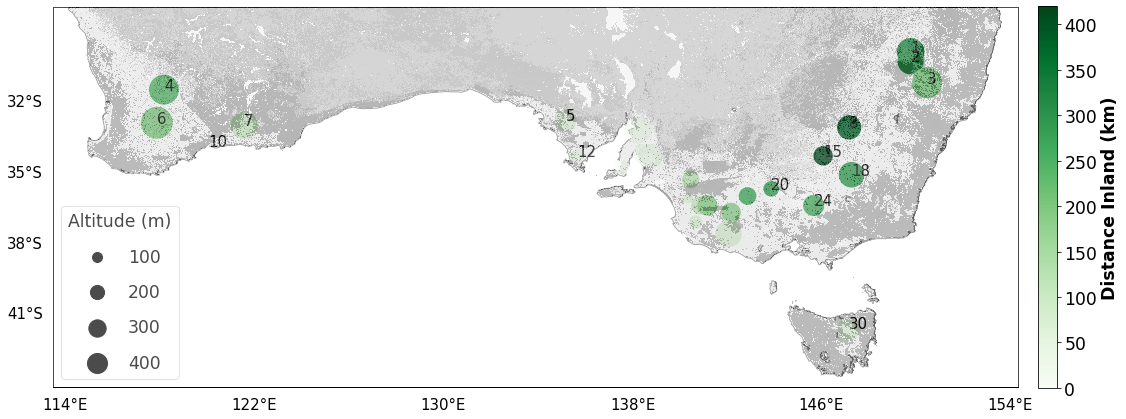

In [454]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=113.5, \
            llcrnrlat=-44.09, \
            urcrnrlon=154.35, \
            urcrnrlat=-28, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")
# labels = [left,right,top,bottom]
parallels = (-32,-35,-38,-41)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=dist_inland, s=altitude*3, alpha=1, cmap='Greens',linewidth=0,zorder=2)

for t in range(0,len(frost7)):
    x,y = m(lon7[t],lat7[t])
    plt.text(x,y,ID7[t],size=15)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Distance Inland (km)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(0, 420)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=1, s=a, label=str(a))

legend= plt.legend(title="Altitude (m)",fontsize='xx-large',scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');
plt.setp(legend.get_title(),fontsize='xx-large')

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\distance_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


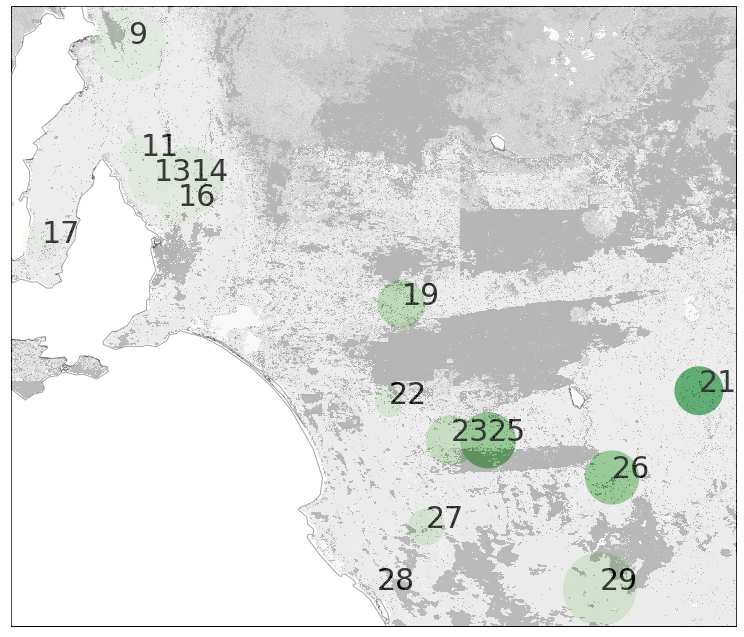

In [453]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=137.35, \
            llcrnrlat=-37.9, \
            urcrnrlon=143.2, \
            urcrnrlat=-32.9, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=dist_inland, s=altitude*23, alpha=1, cmap='Greens',linewidth=0,zorder=2)

for t in range(0,len(dist_inland8)):
    x,y = m(lon8[t],lat8[t])
    plt.text(x,y,ID8[t],size=30)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\distance_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


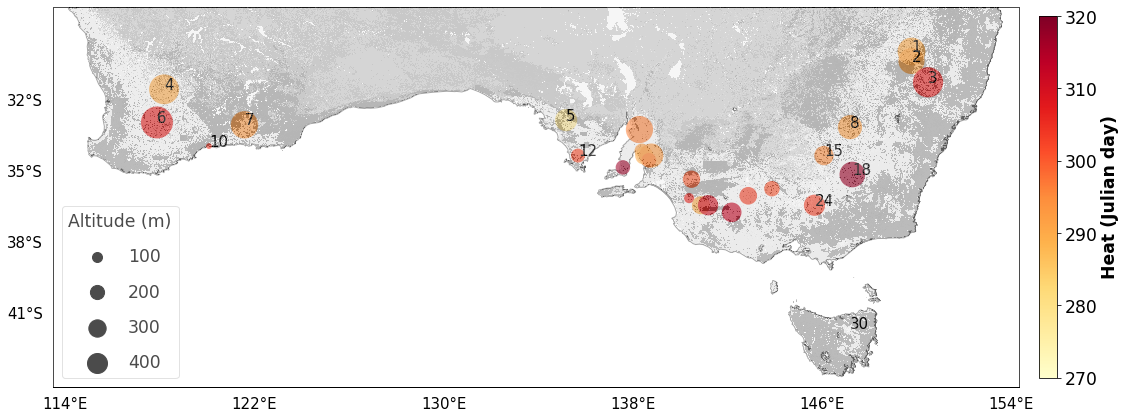

In [443]:
# draw the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=113.5, \
            llcrnrlat=-44.09, \
            urcrnrlon=154.35, \
            urcrnrlat=-28, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")
# labels = [left,right,top,bottom]
parallels = (-32,-35,-38,-41)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=heat, s=altitude*3, alpha=0.8, cmap='YlOrRd',linewidth=0,zorder=2)

for t in range(0,len(heat2)):
    x,y = m(lon2[t],lat2[t])
    plt.text(x,y,ID2[t],size=15)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.018, pad=0.02)
cb.set_label(label='Heat (Julian day)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(270, 320)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=1, s=a, label=str(a))

legend= plt.legend(title="Altitude (m)",fontsize='xx-large',scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');
plt.setp(legend.get_title(),fontsize='xx-large')

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\heat_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


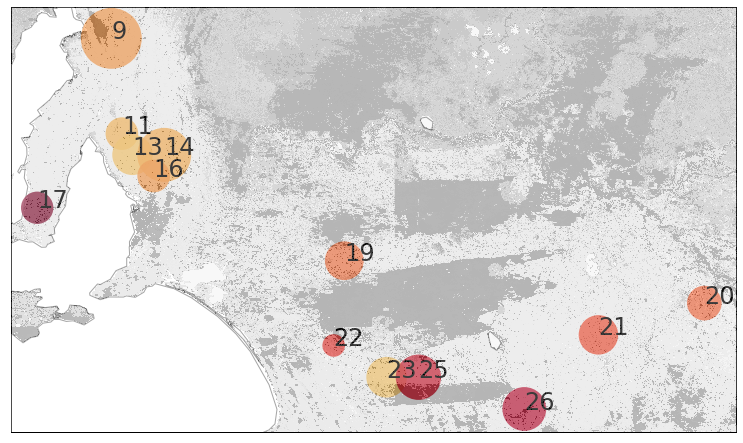

In [415]:
# draw a section of the map background
fig = plt.figure(figsize=(13,13))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=137.35, \
            llcrnrlat=-36.92, \
            urcrnrlon=144.2, \
            urcrnrlat=-32.9, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=heat, s=altitude*15, alpha=0.8, cmap='YlOrRd',linewidth=0,zorder=2)

for t in range(0,len(heat3)):
    x,y = m(lon3[t],lat3[t])
    plt.text(x,y,ID3[t],size=24)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\heat_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


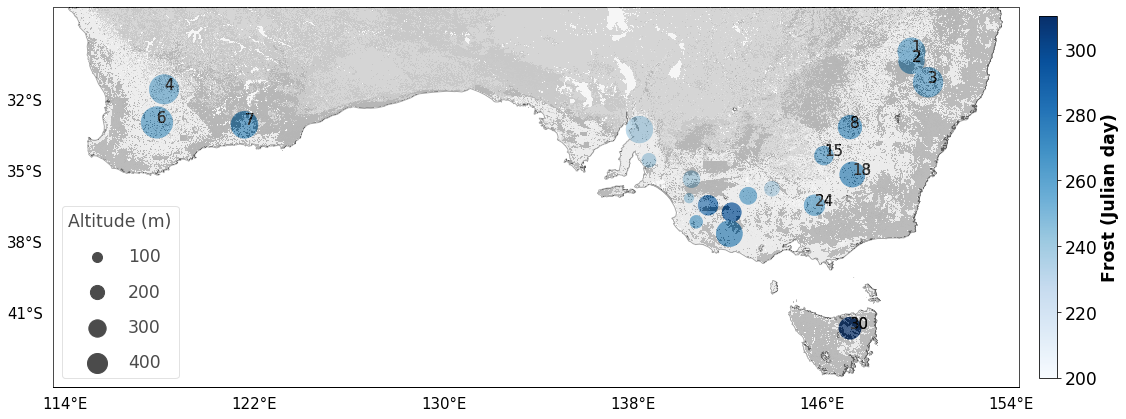

In [416]:
# draw a section of the map background
fig = plt.figure(figsize=(18,18))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=113.5, \
            llcrnrlat=-44.09, \
            urcrnrlon=154.35, \
            urcrnrlat=-28, \
            resolution='i')

# plot points using color for frost data and size for altitude
m.scatter(lon, lat, latlon=True, c=frost, s=altitude*3, alpha=0.8, cmap='Blues',linewidth=0,zorder=2)

for t in range(0,len(frost5)):
    x,y = m(lon5[t],lat5[t])
    plt.text(x,y,ID5[t],size=15)

# create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.018, pad=0.02)
cb.set_label(label='Frost (Julian day)', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='xx-large')
plt.clim(200, 310)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=1, s=a, label=str(a))

legend= plt.legend(title="Altitude (m)",fontsize='xx-large',scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');
plt.setp(legend.get_title(),fontsize='xx-large')

m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# labels = [left,right,top,bottom]
parallels = (-32,-35,-38,-41)
m.drawparallels(parallels,labels=[True,False,False,False],linewidth=0,size=15)
meridians = (114,122,130,138,146,154)
m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0,size=15)

# plot points using color for frost data and size for altitude
m.scatter(lon, lat, latlon=True, c=frost, s=altitude*3, alpha=0.8, cmap='Blues',linewidth=0,zorder=2)

for t in range(0,len(frost5)):
    x,y = m(lon5[t],lat5[t])
    plt.text(x,y,ID5[t],size=15)
    
# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\frost_v2_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


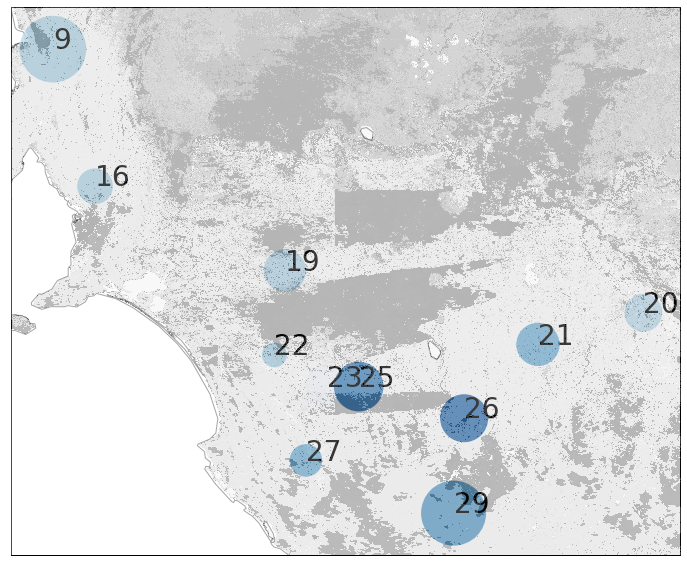

In [417]:
# draw a section of the map background
fig = plt.figure(figsize=(12,12))

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap(projection='cyl', \
            llcrnrlon=137.9, \
            llcrnrlat=-38, \
            urcrnrlon=144.25, \
            urcrnrlat=-32.8, \
            resolution='i')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='none')
m.drawcoastlines(color="grey")

# plot points using color for frost data and size for altitude
m.scatter(lon, lat, latlon=True, c=frost, s=altitude*18, alpha=0.8, cmap='Blues',linewidth=0,zorder=2)

for t in range(0,len(frost6)):
    x,y = m(lon6[t],lat6[t])
    plt.text(x,y,ID6[t],size=28)

# full path to the geotiff file
fpath = r"C:\Users\jjojeda\Dropbox\Victor\gr\tif3.tif" 

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=True)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=100, alpha=0.3, cmap=plt.cm.binary)

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\frost_v2b_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


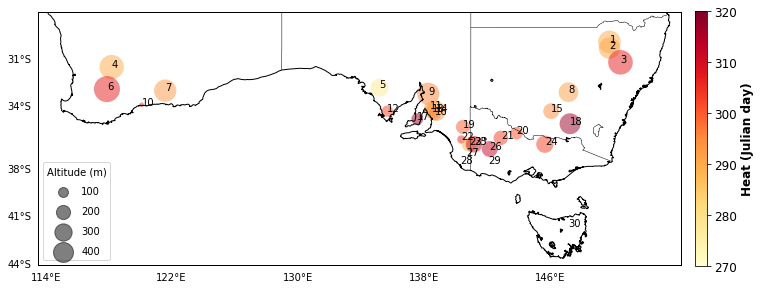

In [441]:
# 1. draw the map background
fig = plt.figure(figsize=(12, 12))

bbox = [-44.09, -28, 113.5, 154.35] 

m = Basemap(llcrnrlat=bbox[0],urcrnrlat=bbox[1],llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i', epsg='4326')
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5).round(0),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5).round(0),labels=[0,0,0,1],rotation=0, linewidth=0)
m.drawmapboundary()
m.drawcountries()
m.drawcoastlines()
m.drawstates()

# 2. plot points using color for heat data and size for altitude
m.scatter(lon, lat, latlon=True, c=heat, s=altitude*2, alpha=0.5, cmap='YlOrRd',linewidth=0)

for t in range(0,len(heat)):
    x,y = m(lon[t],lat[t])
    plt.text(x,y,ID[t])

# 3. create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.019, pad=0.02)
cb.set_label(label='Heat (Julian day)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.clim(270, 320)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a))

plt.legend(title="Altitude (m)",scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\heat_altitude_.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


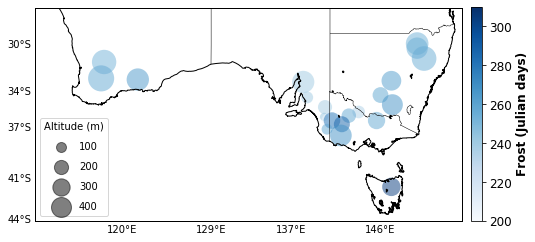

In [418]:
# 1. draw the map background
fig = plt.figure(figsize=(8, 8))

bbox = [-44.09, -26.7,111.27,154.35] 

m = bm.Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5).round(0),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5).round(0),labels=[0,0,0,1],rotation=0, linewidth=0)
m.drawmapboundary()
m.drawcountries()
m.drawcoastlines()
m.drawstates()

# 2. plot points using color for frost data and size for altitude
m.scatter(lon, lat, latlon=True, c=frost, s=altitude*2, alpha=0.5, cmap='Blues',linewidth=0)

# 3. create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.024, pad=0.02)
cb.set_label(label='Frost (Julian days)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.clim(200, 310)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a))

plt.legend(title="Altitude (m)",scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\frost_altitude_x.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


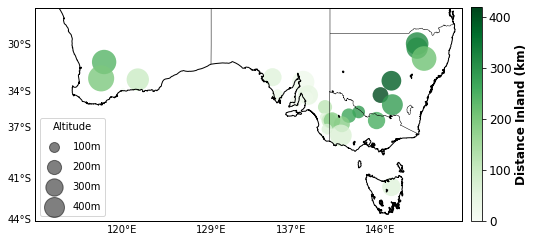

In [419]:
# 1. draw the map background
fig = plt.figure(figsize=(8, 8))

bbox = [-44.09, -26.7,111.27,154.35] 

m = bm.Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5).round(0),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5).round(0),labels=[0,0,0,1],rotation=0, linewidth=0)
m.drawmapboundary()
m.drawcountries()
m.drawcoastlines()
m.drawstates()

# 2. plot points using color for distance from inland data and size for altitude
m.scatter(lon, lat, latlon=True, c=dist_inland, 
          s=altitude*2, alpha=0.8, cmap='Greens',linewidth=0)

# 3. create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.024, pad=0.02)
cb.set_label(label='Distance Inland (km)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.clim(0, 420)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + 'm')

plt.legend(title="Altitude",scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\dist_inland_altitude.png', dpi=600, bbox_inches='tight', pad_inches=0.0)

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


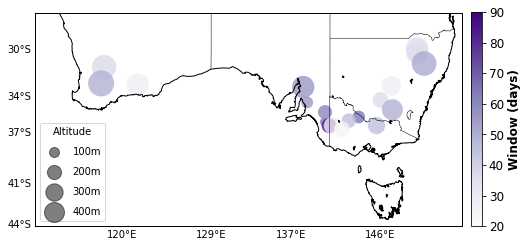

In [420]:
# 1. draw the map background
fig = plt.figure(figsize=(8, 8))

bbox = [-44.09, -26.7,111.27,154.35] 

m = bm.Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5).round(0),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5).round(0),labels=[0,0,0,1],rotation=0, linewidth=0)
m.drawmapboundary()
m.drawcountries()
m.drawcoastlines()
m.drawstates()

# 2.  plot points using color for window data and size for altitude
m.scatter(lon, lat, latlon=True, c=window, 
          s=altitude*2, alpha=0.8, cmap='Purples',linewidth=0)

# 3. create colorbar and legend
cb=plt.colorbar(drawedges=False, fraction=0.024, pad=0.02)
cb.set_label(label='Window (days)', size='large', weight='bold')
cb.ax.tick_params(labelsize='large')
plt.clim(20, 90)
cb.set_alpha(1)
cb.draw_all()

# make legend with dummy points
for a in [100, 200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + 'm')

plt.legend(title="Altitude",scatterpoints=1, frameon=True, labelspacing=1, loc='lower left');

#plt.savefig(r'C:\Users\jjojeda\Dropbox\Victor\window_inland_altitude.png', dpi=600, bbox_inches='tight', pad_inches=0.0)